In [8]:
from os import pardir, path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import keras; print(keras.__version__)

2.0.4


In [4]:
np.random.seed(1337)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPool1D

In [162]:
file = path.join(pardir, "data", "interim", "df.csv")
df = pd.read_csv(file, index_col=0)

In [148]:
df_orig = df.copy()

In [163]:
df = df.reset_index()

I personally think that the below drawing is one of the most fascinating. It plots only the temperature columns of the data frame, for the first 800 cycles in the database. 800 is arbitrarily chosen because it looks nice.

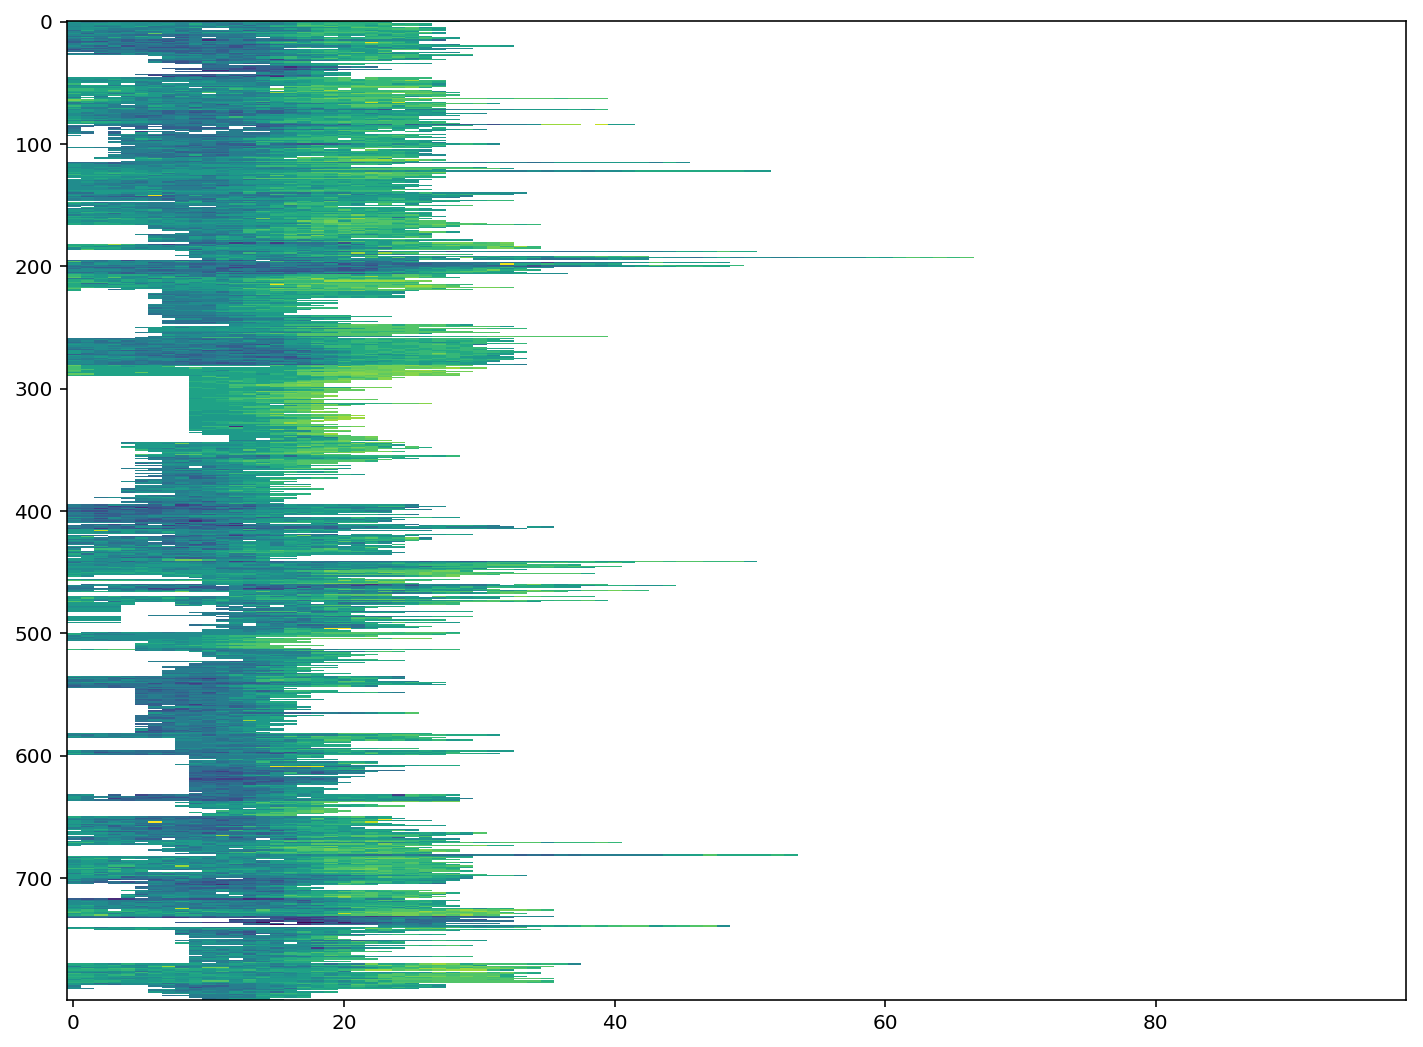

In [61]:
plt.imshow(df.iloc[:800,11:-2], aspect='auto')
figure = plt.gcf()
figure.set_size_inches((12,9))

In [66]:
df_temperatures = df.iloc[:,11:-2]
df_temperatures.head()

,TEMP1,TEMP2,TEMP3,TEMP4,TEMP5,TEMP6,TEMP7,TEMP8,TEMP9,TEMP10,...,TEMP90,TEMP91,TEMP92,TEMP93,TEMP94,TEMP95,TEMP96,TEMP97,TEMP98,TEMP99
0,98.3,98.0,98.0,98.0,98.2,98.0,98.0,98.1,97.9,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.3,98.0,98.0,98.2,98.1,98.2,98.1,98.0,98.0,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98.2,98.3,98.4,98.4,98.3,98.2,98.3,98.4,98.1,98.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,98.2,98.3,98.1,98.2,98.3,98.2,98.4,98.2,98.0,98.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,98.1,98.2,97.9,98.0,98.3,98.6,97.9,98.0,98.0,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
X = df_temperatures
y = df.L_PREOVULATION

In [127]:
X = X.values.reshape((len(X), 99, 1))
y = y.values.reshape((len(y), 1))# keras.utils.to_categorical(y)

In [118]:
from sklearn.model_selection import GroupShuffleSplit

In [155]:
def mlp_model():
    model = Sequential()
    model.add(Dense(50, input_dim=99, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [156]:
estimator = KerasRegressor(build_fn=mlp_model, epochs=100, batch_size=5, verbose=1)

In [165]:
kfold = KFold(n_splits=10, random_state=1337)
results = cross_val_score(estimator, X, y, cv=kfold)

Epoch 1/100


KeyError: '[17584   184  8042 15611  8547] not in index'

In [138]:
def build_model():
    model = Sequential()
    model.add(Conv1D(filters=1, kernel_size=10, strides=10, activation='relu', input_shape=(99, 1)))
    model.add(MaxPool1D())
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [120]:
from keras.wrappers.scikit_learn import KerasRegressor

In [140]:
clf = KerasRegressor(build_fn=build_model, epochs=100, batch_size=1, verbose=1)

In [122]:
from sklearn.model_selection import KFold, cross_val_score

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337)

In [137]:
model = build_model()
model.summary()

ValueError: Input 0 is incompatible with layer conv1d_17: expected ndim=3, found ndim=2

In [141]:
for iteration in range(100):
    print()
    print('-' * 50)
    print('Iteration', iteration)
    model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))
    
    for i in range(10):
        ind = np.random.randint(0, len(X_test))
        rowx, rowy = X_test[np.array([ind])], y_test[np.array([ind])]
        preds = model.predict_classes(rowx, verbose=0)
        print(preds)
        print('---')


--------------------------------------------------
Iteration 0
Train on 21973 samples, validate on 7325 samples
Epoch 1/5
21973/21973 [==============================] - 1s - loss: 16.4811 - val_loss: 16.2129
Epoch 2/5
21973/21973 [==============================] - 1s - loss: 16.4810 - val_loss: 16.2129
Epoch 3/5
21973/21973 [==============================] - 1s - loss: 16.4809 - val_loss: 16.2129
Epoch 4/5
21973/21973 [==============================] - 0s - loss: 16.4810 - val_loss: 16.2129
Epoch 5/5
21973/21973 [==============================] - 0s - loss: 16.4811 - val_loss: 16.2130
[[1]]
---
[[1]]
---
[[1]]
---
[[1]]
---
[[1]]
---
[[1]]
---
[[1]]
---
[[1]]
---
[[1]]
---
[[1]]
---

--------------------------------------------------
Iteration 1
Train on 21973 samples, validate on 7325 samples
Epoch 1/5
21973/21973 [==============================] - 1s - loss: 16.4811 - val_loss: 16.2130
Epoch 2/5
21973/21973 [==============================] - 1s - loss: 16.4810 - val_loss: 16.2129
Ep

KeyboardInterrupt: 

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

estimators = []
estimators.append(('scl', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=build_model, epochs=50, batch_size=5, verbose=1)))
pipeline = Pipeline(estimators)
cv = KFold(n_splits=10, random_state=1337)
pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)
mean_squared_error(y_hat, y_test)

ValueError: Found array with dim 3. StandardScaler expected <= 2.

---


In [169]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [170]:
numpy.random.seed(7)

In [172]:
scaler = MinMaxScaler(feature_range=(0, 1))

df1 = scaler.fit_transform(df_temperatures)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').